# <div class="alert alert-success" > Pandas DataFrame methods

In [28]:
import pandas as pd
import numpy as np

## <div class= "alert alert-info"> .at and .iat

## <div class= "alert alert-info"> .rename()

## <div class= "alert alert-info"> .insert() 

## <div class= "alert alert-info"> .pop(column) 

## <div class= "alert alert-info"> .drop()

## <div class= "alert alert-info"> .append()

## <div class= "alert alert-info"> .concat()

## <div class= "alert alert-info">  .reset_index()

## <div class= "alert alert-info"> .set_index()

## <div class= "alert alert-info"> .reindex()

## <div class= "alert alert-info"> .nunique()

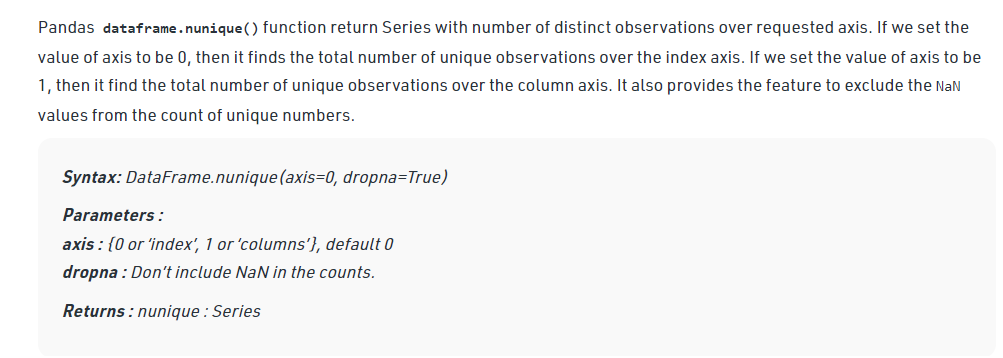

## <div class= "alert alert-info"> .to_timedate()

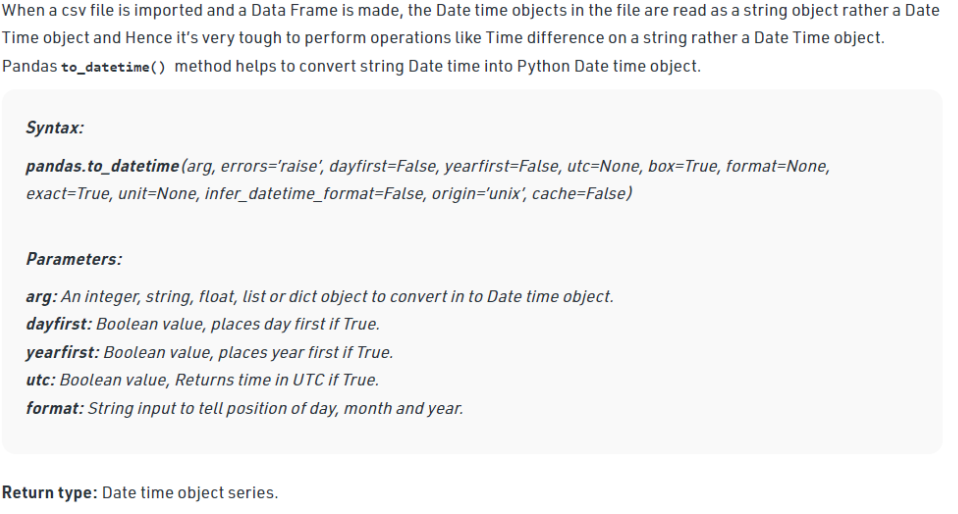

# <div class= "alert alert-info"> .duplicates()

# <div class= "alert alert-info"> 

# <div class= "alert alert-info"> 

## <div class= "alert alert-info">  .isnull()

# <div class= "alert alert-info"> .notnull()

# <div class= "alert alert-info"> .count()

# <div class= "alert alert-info"> .dropna()

# <div class= "alert alert-info"> .fillna()

# <div class= "alert alert-info"> .interpolate()
    
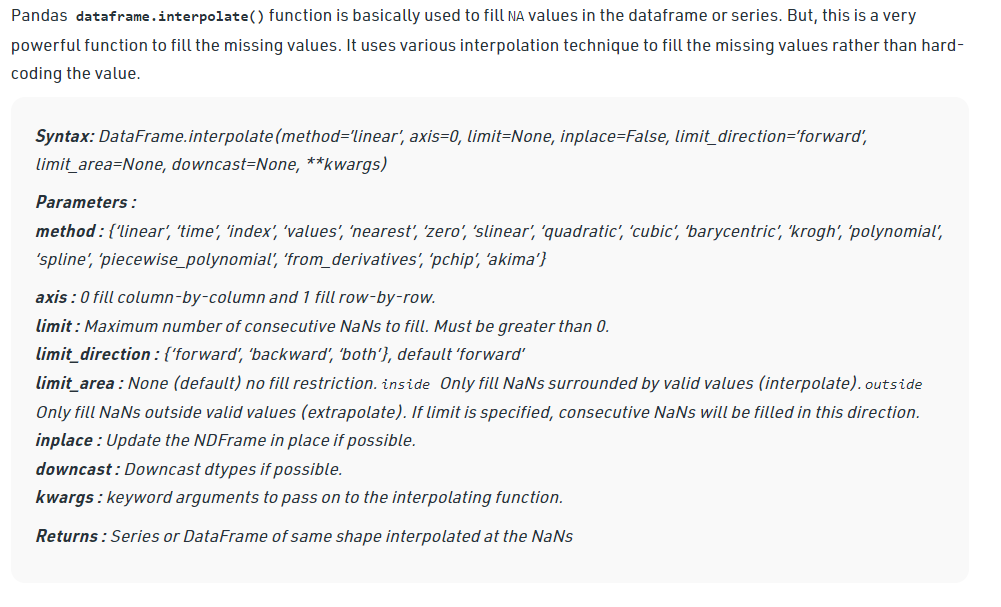    
    
By default, linear interpolation is done for each column. The same value is repeated for Nan at the bottom, and Nan at the top is unchanged.    

In [9]:
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})

df

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,1.0,NaN,8.0,6.0


In [12]:
print(df.interpolate())

      A     B     C     D
0  12.0   NaN  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0   9.5   4.0
3   3.0   3.0   3.0   5.0
4   1.0   3.0   8.0   6.0


#### Row or column: axis

If axis=1, interpolation is done for each row. The same value is repeated for the rightmost NaN, and the leftmost NaN is unchanged.

In [17]:
print(df.interpolate(axis=1))

      A     B     C     D
0  12.0  16.0  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0  54.0  54.0
3   NaN   3.0   3.0   3.0
4   1.0   4.5   8.0   6.0


#### Maximum number of consecutive NaNs to fill: limit
If NaNs are consecutive, you can specify the maximum number of interpolation with the argument limit. The default is None, which means that all consecutive NaNs are interpolated.

In [18]:
print(df.interpolate(limit=1))

      A     B     C     D
0  12.0   NaN  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0   9.5   4.0
3   3.0   3.0   3.0   NaN
4   1.0   3.0   8.0   6.0


#### Direction to interpolate: limit_direction
The direction to interpolate is specified with the argument limit_direction as one of 'forward', 'backward', or 'both'.

In [19]:
print(df.interpolate(limit=1, limit_direction='forward'))

      A     B     C     D
0  12.0   NaN  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0   9.5   4.0
3   3.0   3.0   3.0   NaN
4   1.0   3.0   8.0   6.0


In [20]:
print(df.interpolate(limit=1, limit_direction='backward'))


      A     B     C     D
0  12.0   2.0  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0   9.5   NaN
3   3.0   3.0   3.0   5.0
4   1.0   NaN   8.0   6.0


In [21]:
print(df.interpolate(limit=1, limit_direction='both'))


      A     B     C     D
0  12.0   2.0  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0   9.5   4.0
3   3.0   3.0   3.0   5.0
4   1.0   3.0   8.0   6.0


As mentioned above, by default, NaNs at the top (or left) are left as they are, but if you set limit_direction='both', both ends are interpolated.

In [22]:
print(df.interpolate(limit_direction='both'))


      A     B     C     D
0  12.0   2.0  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0   9.5   4.0
3   3.0   3.0   3.0   5.0
4   1.0   3.0   8.0   6.0


#### Interpolate or extrapolate or both: limit_area
You can specify the area to be interpolated with the argument limit_area.

- 'inside': Only interpolation

- 'outside': Only extrapolation

- None (default): Both interpolation and extrapolation

In [23]:
print(df.interpolate(limit_area='inside'))

      A     B     C     D
0  12.0   NaN  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0   9.5   4.0
3   3.0   3.0   3.0   5.0
4   1.0   NaN   8.0   6.0


In [24]:
print(df.interpolate(limit_area='outside'))

      A     B     C     D
0  12.0   NaN  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0   NaN   NaN
3   NaN   3.0   3.0   NaN
4   1.0   3.0   8.0   6.0


In [25]:
print(df.interpolate(limit_area='outside', limit_direction='both'))

      A     B     C     D
0  12.0   2.0  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0   NaN   NaN
3   NaN   3.0   3.0   NaN
4   1.0   3.0   8.0   6.0


Note that the word "extrapolation" is used for convenience, but as you can see from the above results, in linear interpolation (default), the outer values are repetitions of the end values and are not linearly extrapolated. In the spline interpolation described below, the outer values are extrapolated rather than repeated.

#### Operate inplace: inplace
As with many other methods, you can update the object itself with inplace=True.

df.interpolate(inplace=True)

print(df)

#### Interpolation method: method
The interpolation method is specified by the first argument method. The default value is 'linear' (linear interpolation).

#### Linear interpolation: linear, index, values

With method='linear' (default), the index is ignored, but with method='index' or method='values', it is interpolated using the index value. 

In [29]:
s = pd.Series([0, np.nan, np.nan, 3],index=[0, 4, 6, 8])
print(s)

0    0.0
4    NaN
6    NaN
8    3.0
dtype: float64


In [30]:
print(s.interpolate())

0    0.0
4    1.0
6    2.0
8    3.0
dtype: float64


In [31]:
print(s.interpolate('index'))

0    0.00
4    1.50
6    2.25
8    3.00
dtype: float64


If the index column is strings, method='linear' (default) is fine, but If method='index' or method='values', an error is raised.

In [32]:
s.index = list('abcd')
print(s)

a    0.0
b    NaN
c    NaN
d    3.0
dtype: float64


In [33]:
print(s.interpolate())
# print(s.interpolate('index'))
# TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64


# <div class= "alert alert-info"> 